In [26]:
import os
import numpy as np 
import pandas as pd 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import winsound
import pywt


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


In [4]:
for dirname, _, filenames in os.walk('../dataset/'):    
    files = {}
    for filename in filenames:        
        files[filename] = os.path.join(dirname, filename)
print(files)

# Open classes.txt
with open(files['classes.txt']) as file: 

   classes = file.read()

def str_to_list(line):
    line = line.replace('\n','')
    line = line.replace('classes = ','')
    line = eval(line)
    return line
    
classes = str_to_list(classes)
print(classes)

def notification():
    for _ in range(5):
        winsound.Beep(500, 200)
        winsound.Beep(1200, 200)
        winsound.Beep(500, 200)
        winsound.Beep(1200, 200)

{'.gitignore': '../dataset/.gitignore', 'archive.zip': '../dataset/archive.zip', 'classes.txt': '../dataset/classes.txt', 'labels.npy': '../dataset/labels.npy', 'LICENSE.TXT': '../dataset/LICENSE.TXT', 'model_full_SNR.h5': '../dataset/model_full_SNR.h5', 'signals.npy': '../dataset/signals.npy', 'snrs.npy': '../dataset/snrs.npy', 'train_acc.npy': '../dataset/train_acc.npy', 'train_loss.npy': '../dataset/train_loss.npy', 'val_acc.npy': '../dataset/val_acc.npy', 'val_loss.npy': '../dataset/val_loss.npy'}
['32PSK', '16APSK', '32QAM', 'FM', 'GMSK', '32APSK', 'OQPSK', '8ASK', 'BPSK', '8PSK', 'AM-SSB-SC', '4ASK', '16PSK', '64APSK', '128QAM', '128APSK', 'AM-DSB-SC', 'AM-SSB-WC', '64QAM', 'QPSK', '256QAM', 'AM-DSB-WC', 'OOK', '16QAM']


In [5]:
labels_path = '../dataset/labels.npy'
signals_path = '../dataset/signals.npy'
snrs_path = '../dataset/snrs.npy'

labels = np.load(labels_path, mmap_mode = 'r')
signals = np.load(signals_path, mmap_mode = 'r')
snrs = np.load(snrs_path, mmap_mode = 'r')

print(signals.shape)
print(labels.shape)
print(snrs.shape)


(2555904, 1024, 2)
(2555904, 24)
(2555904, 1)


In [161]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(signals, labels, snrs, train_size=1/32, stratify=labels, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_shape.shape)
notification()

(79872, 1024, 2)
(2476032, 1024, 2)
(79872, 24)
(2476032, 24)


e:\BAGAS\code\_env\signal-based-ML-py3.9\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\Base Engineering\AppData\Local\Temp\ipykernel_4048\2656392341.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(im_coef).shape)


(11,)


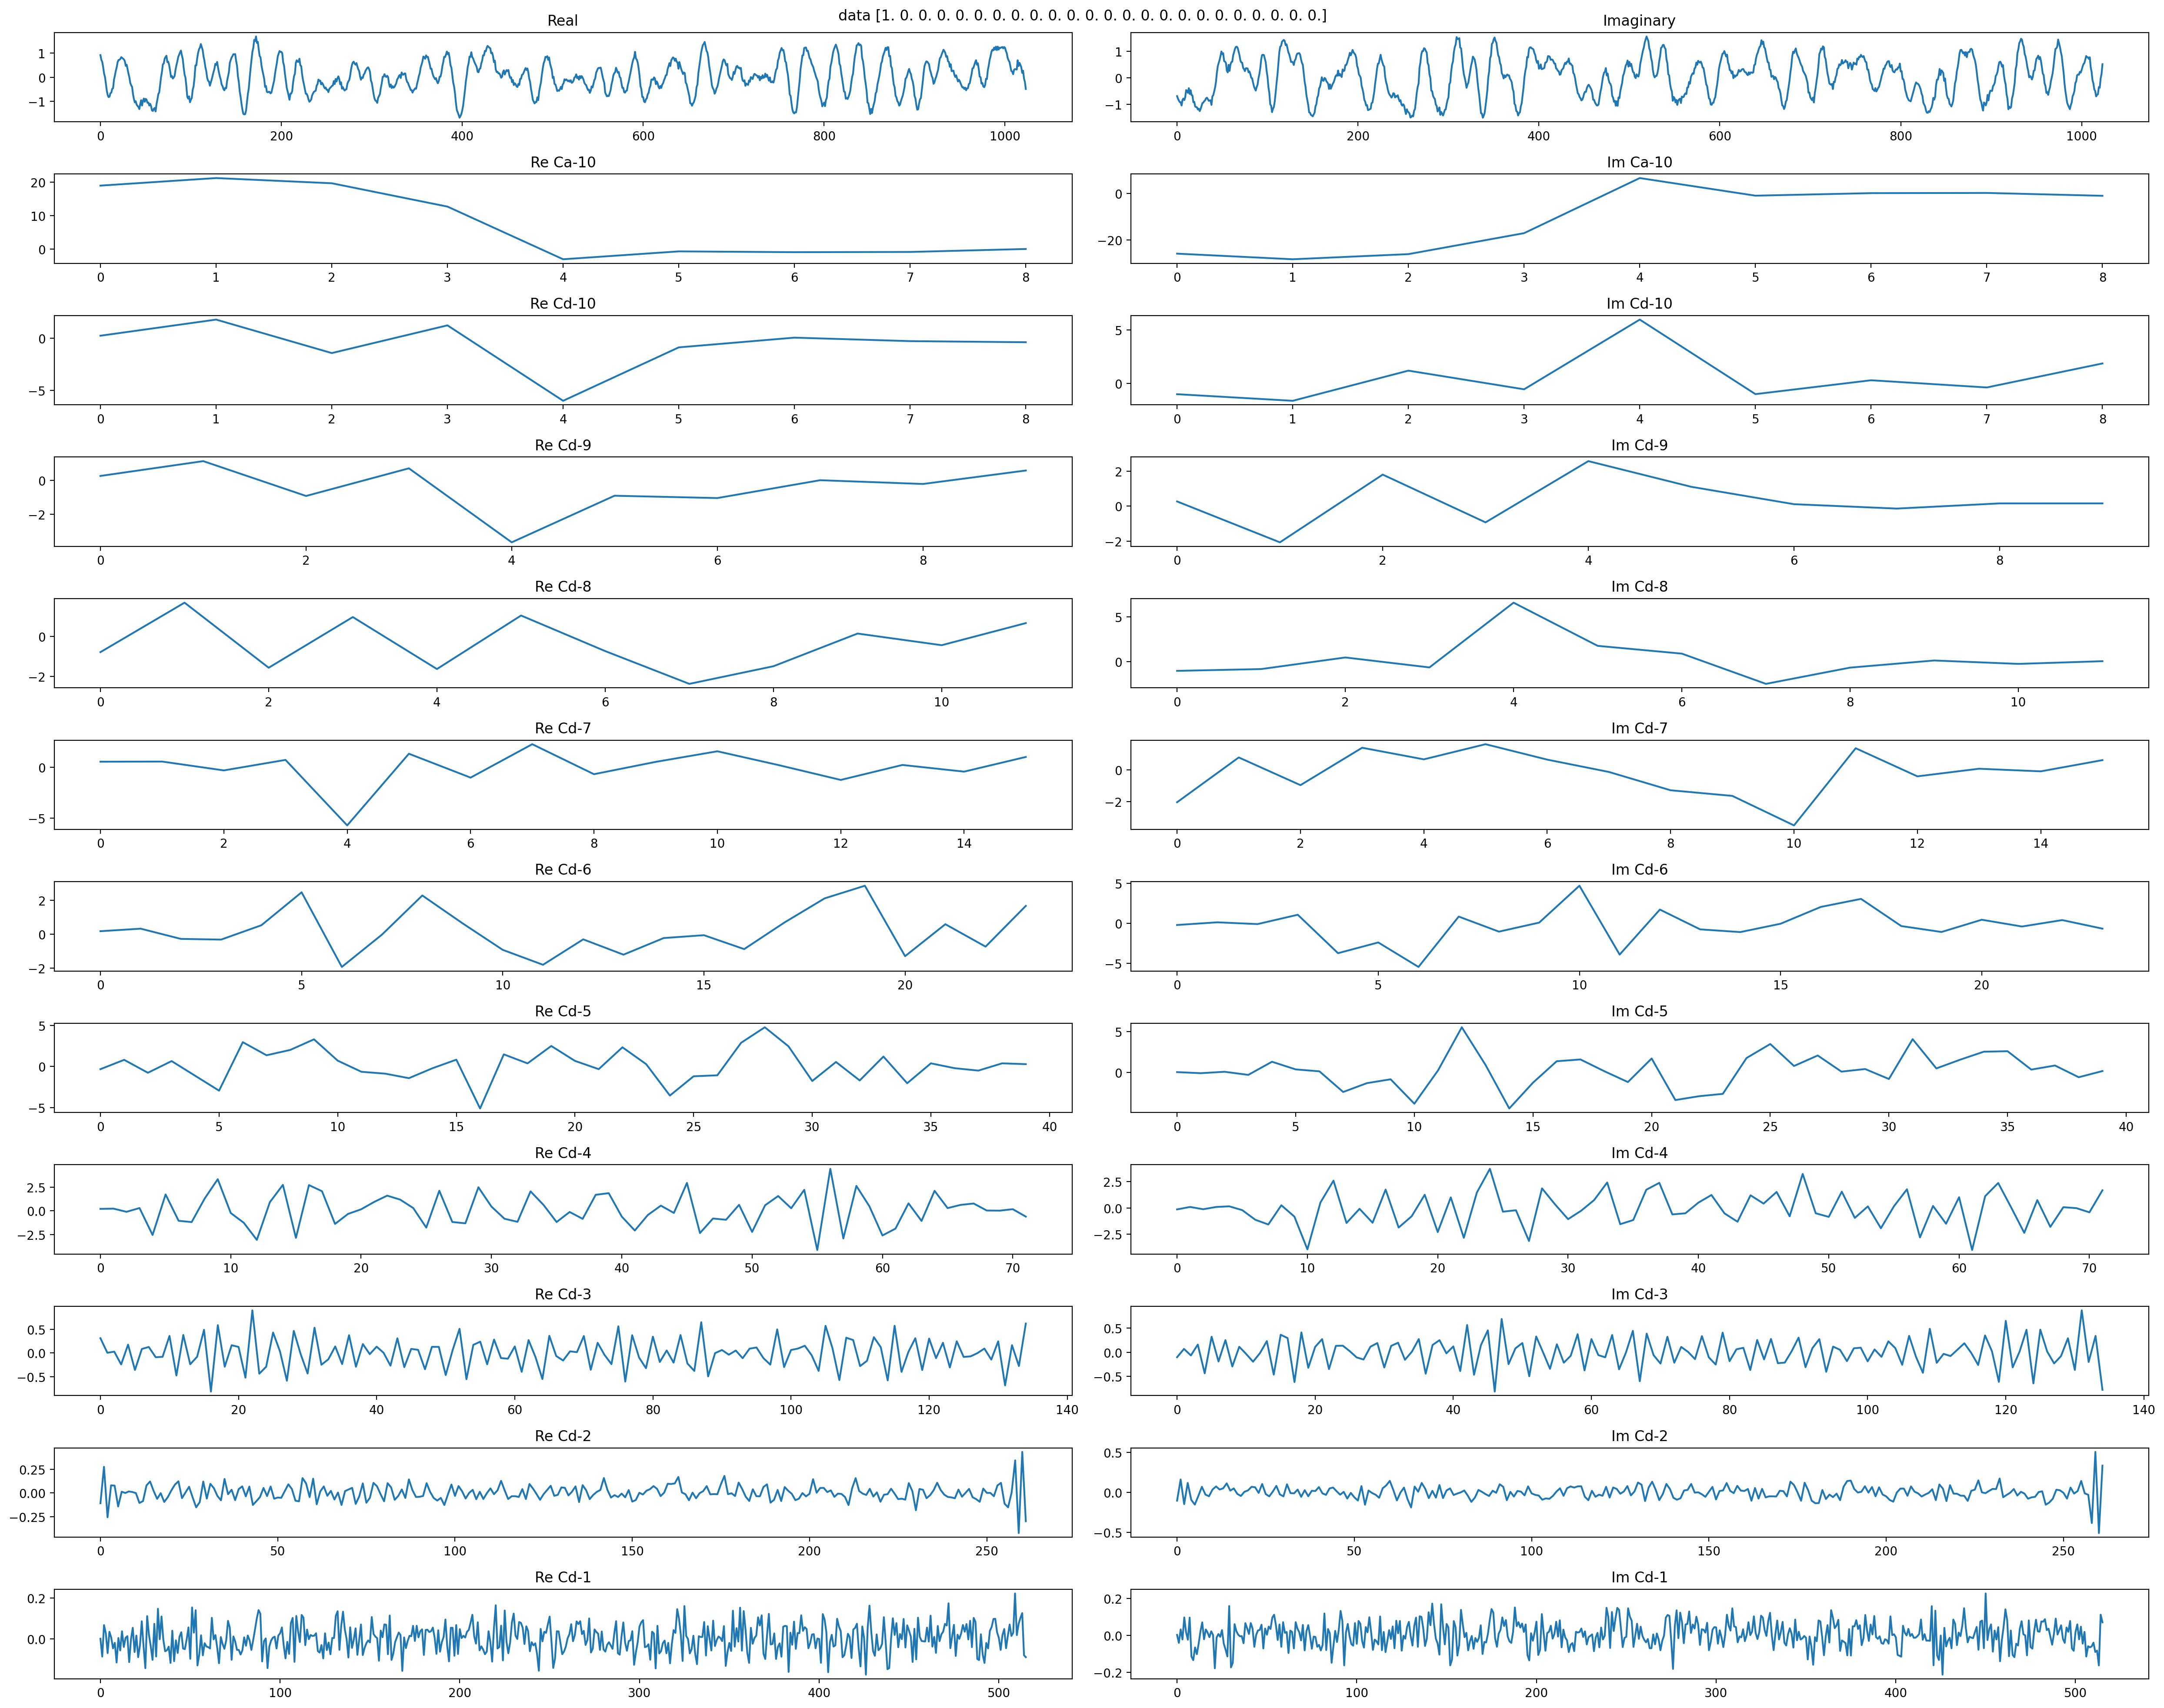

In [162]:
num_level = 10
fig, ax = plt.subplots(num_level+2, 2, figsize=(25,20), dpi=200)
fig.suptitle(f'data {labels[0]}')
signal_imaginary = x_train[0][:, 0]
signal_real = x_train[0][:, 1]

im_coef = pywt.wavedec(signal_imaginary, 'sym5', level=num_level)
print(np.array(im_coef).shape)
# [Ca3_im, Cd4_im, Cd3_im, Cd2_im, Cd1_im] = im_coef
re_coef = pywt.wavedec(signal_real, 'sym5', level=num_level)
# [Ca3_real, Cd4_real, Cd3_real, Cd2_real, Cd1_real] = re_coef

coef_name = ['Ca-', 'Cd-']
count_real = 0
count_imag = 0

for i in range(0, num_level+2):
    for j in range(0, 2):    
        if j == 0:
            # Real
            if i == 0:
                ax[i][j].plot(signal_real)
                ax[i][j].set_title("Real")
            else:
                if i == 1:
                    ax[i][j].plot(re_coef[count_real])
                    ax[i][j].set_title(f"Re {coef_name[0]}{num_level-count_real}")
                    count_real += 1
                else:

                    ax[i][j].plot(re_coef[count_real])
                    ax[i][j].set_title(f"Re {coef_name[1]}{num_level+1-count_real}")
                    count_real += 1
        else:
            # imaginary
            if i == 0:
                ax[i][j].plot(signal_imaginary)
                ax[i][j].set_title("Imaginary")
            else:
                if i == 1:
                    ax[i][j].plot(im_coef[count_imag])
                    ax[i][j].set_title(f"Im {coef_name[0]}{num_level-count_imag}")
                    count_imag += 1
                else:
                    ax[i][j].plot(im_coef[count_imag])
                    ax[i][j].set_title(f"Im {coef_name[1]}{num_level+1-count_imag}")
                    count_imag += 1

plt.tight_layout()
plt.show()

In [164]:
x_train[1][:, 1]

array([ 0.39741722,  0.27659178,  0.15943874, ..., -0.17274201,
       -0.06776786,  0.06079858], dtype=float32)

In [ ]:
class WaveletStatistical:
    def __init__(self, signals, level):
        self.signals = signals
        self.level = level

    def statistical_feature(self):
        for i in range(len(self.signals)):
            self.imag_signals = self.signals[i][:, 0]
            self.real_signals = self.signals[i][:, 1]
            im_coef = pywt.wavedec(self.imag_signals, 'sym5', level=num_level)
            re_coef = pywt.wavedec(self.real_signals, 'sym5', level=num_level)
    

    def mean(self, data):
        total = sum(data)
        count = len(data)
        mean = total / count
        return mean
    
    def std(self, data):
        mean = self.mean(data)
        variance = sum((x - mean) ** 2 for x in data) / len(data)
        standard_deviation = math.sqrt(variance)
        return standard_deviation
    
    

        